In [28]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [187]:
L = 100 # przedział iksów [-L/2, L/2]
n = 100 # liczba punktów
dx = L/n # odległość pomiędzy punktami

def Gauss(x):
    return np.exp(-x**2)

def GaussDerivative(x):
    return -2*np.exp(-x**2)*x

#simple finite difference method
def approximatedDerivative(X):
    derivative = np.zeros(len(X)-1)
    for i in range(len(X)-1):
        derivative[i] = (Gauss(X[i+1])-Gauss(X[i]))/(X[i+1]-X[i])
    return derivative


def spectralDerivative(X):
    f = np.exp(-X**2)
    fhat = np.fft.fft(f)
    omega = (2*np.pi/L)*np.arange(-n/2, n/2)
    omega = np.fft.fftshift(omega)
    dfhat = omega * fhat * (1j)
    dfFFT = np.real(np.fft.ifft(dfhat))

    return np.real(dfFFT)

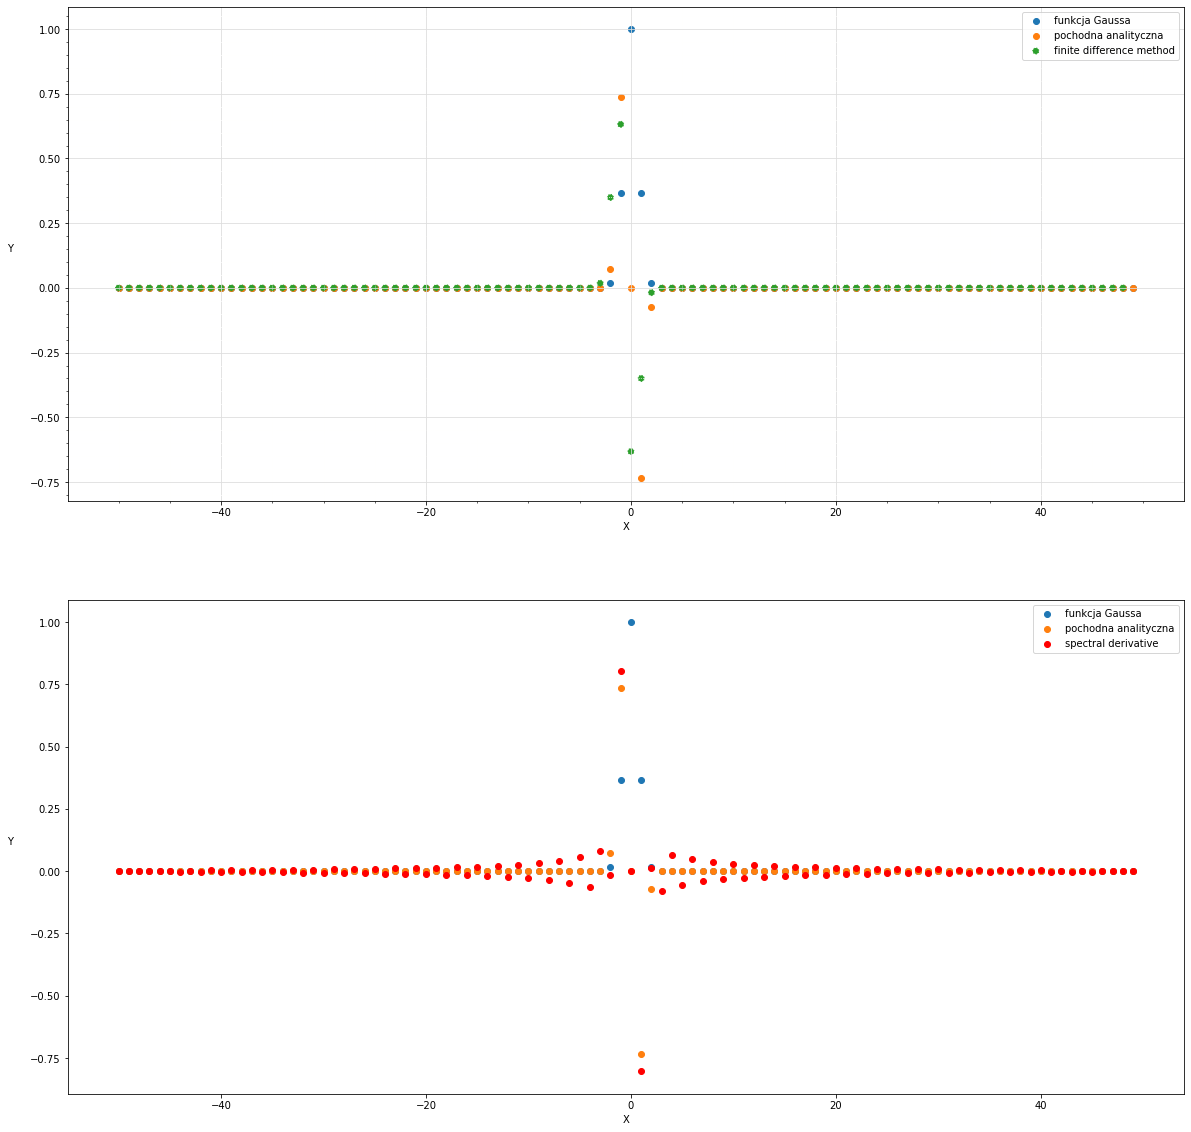

In [188]:
X = np.arange(-L/2, L/2, dx)
Y1 = [Gauss(x) for x in X]
DY1 = [GaussDerivative(x) for x in X]

DX = X[:-1]
DY2 = approximatedDerivative(X)
DFFT = spectralDerivative(X)

fig, ax = plt.subplots(2, figsize=(20, 20))
ax[0].scatter(X, Y1, label='funkcja Gaussa')
ax[0].scatter(X, DY1, label='pochodna analityczna')
ax[0].scatter(DX, DY2, linestyle = 'dotted', label='finite difference method')

ax[1].scatter(X, Y1, label='funkcja Gaussa')
ax[1].scatter(X, DY1, label='pochodna analityczna')
ax[1].scatter(X, DFFT, label='spectral derivative', c='red')

ax[0].set_xlabel("X")
ax[0].set_ylabel("Y", rotation=0, labelpad=20)

ax[1].set_xlabel("X")
ax[1].set_ylabel("Y", rotation=0, labelpad=20)

ax[0].legend()
ax[1].legend()

ax[0].minorticks_on()
ax[0].grid(which='major', color='#DDDDDD', linewidth=0.8)
ax[0].grid(which='minor', color='#FFFFFE', linestyle=':', linewidth=0.8)


plt.show()

In [289]:
L = 30 # przedział iksów i yków [-L/2, L/2]
n = 64 # sqrt(liczba punktów)
dp = L/n # odległość pomiędzy punktami

def Gauss2D(x, y):
    return 2*np.exp(-(0.7*x)**2-y**2)
    
def Gauss2DderivativeX(xv, yv):
    return -1.96*xv*np.exp(-(0.7*xv)**2-yv**2)

def Gauss2DderivativeY(xv, yv):
    return -4*yv*np.exp(-(0.7*xv)**2-yv**2)

#simple finite difference method
# def approximatedDerivativeX(xv, yv):
#     for i in range((len(X)-1)**2):
#         derivative[i] = (Gauss2D(xv[i+1])-Gauss2D(xv[i]))/2*(xv[i+1]-xv[i])
#     return derivative

# def approximatedDerivativeY(xv, yv):
#     for i in range((len(X)-1)**2):
#         derivative[i] = (Gauss2D(xv[i+1])-Gauss2D(xv[i]))/2*(xv[i+1]-xv[i])
#     return derivative

def spectralDerivativeX(X, Y):
    f = Gauss2D(X, Y)
    fhat = np.fft.fft2(f)
    omega_x = (2*np.pi/L)*np.arange(-n/2, n/2)
    omega_y = (2*np.pi/L)*np.arange(-n/2, n/2)  
    omega_x, omega_y = np.meshgrid(omega_x, omega_y)
    omega_x = np.fft.fftshift(omega_x)
    dfhat = omega_x * fhat * (1j)
    dfFFT = np.real(np.fft.ifft2(dfhat))

    return dfFFT

def spectralDerivativeY(X, Y):
    f = Gauss2D(X, Y)
    fhat = np.fft.fft2(f)
    omega_x = (2*np.pi/L)*np.arange(-n/2, n/2)
    omega_y = (2*np.pi/L)*np.arange(-n/2, n/2)
    omega_x, omega_y = np.meshgrid(omega_x, omega_y)
    omega_y = np.fft.fftshift(omega_y)
    dfhat = omega_y * fhat * (1j)
    dfFFT = np.real(np.fft.ifft2(dfhat))

    return np.real(dfFFT)

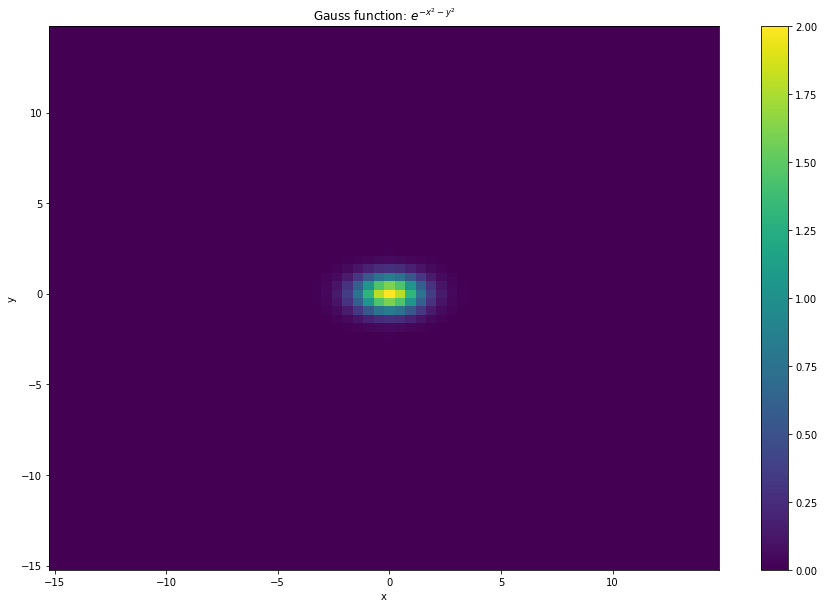

In [290]:
plt.figure(figsize=(15,10))

x = np.arange(-L/2, L/2, dp)
y = np.arange(-L/2, L/2, dp)

xv, yv = np.meshgrid(x, y)
f = Gauss2D(xv, yv)

plt.title(r'Gauss function: $e^{-x^2-y^2}$')
plt.pcolormesh(xv, yv, f)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

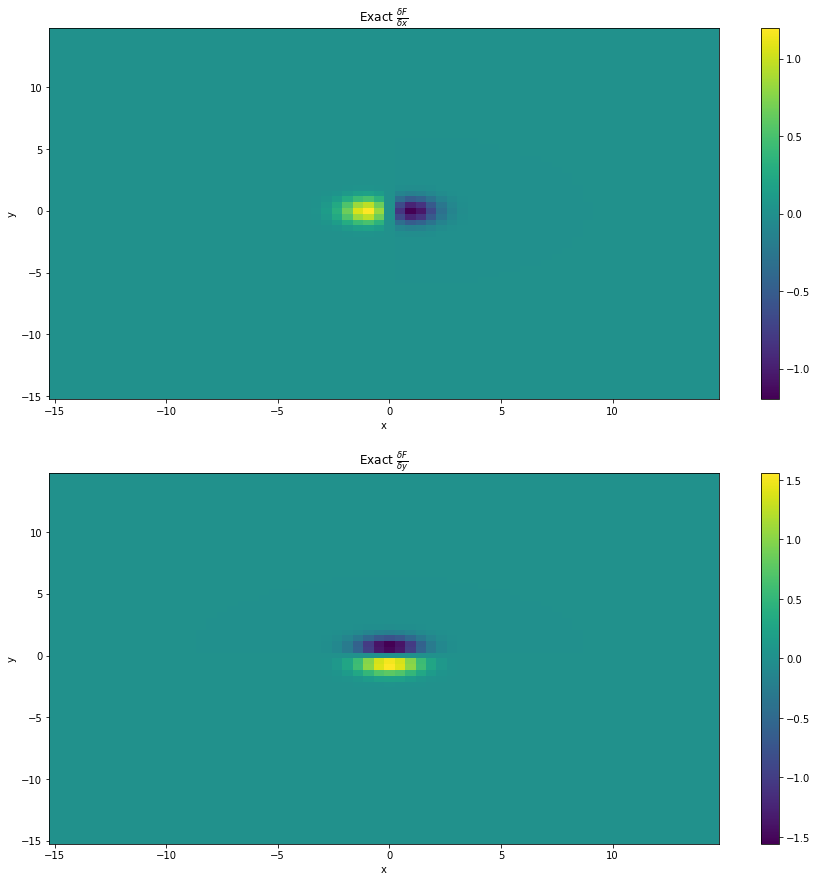

In [291]:
plt.figure(1, figsize=(15, 15))

fx = Gauss2DderivativeX(xv, yv)
fy = Gauss2DderivativeY(xv, yv)

plt.subplot(211)
plt.pcolormesh(xv, yv, fx)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Exact $\frac{\delta F}{\delta x}$')
plt.colorbar()
plt.subplot(212)
plt.pcolormesh(xv, yv, fy)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Exact $\frac{\delta F}{\delta y}$')
plt.colorbar()
plt.show()

In [292]:
# plt.figure(1, figsize=(15, 15))

# fx = approximatedDerivativeX(xv, yv) 
# fy = approximatedDerivativeY(xv, yv)

# plt.subplot(211)
# plt.pcolormesh(xv, yv, fx)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title(r'FDM $\frac{\delta F}{\delta x}$')
# plt.colorbar()
# plt.subplot(212)
# plt.pcolormesh(xv, yv, fy)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title(r'FDM $\frac{\delta F}{\delta y}$')
# plt.colorbar()
# plt.show()

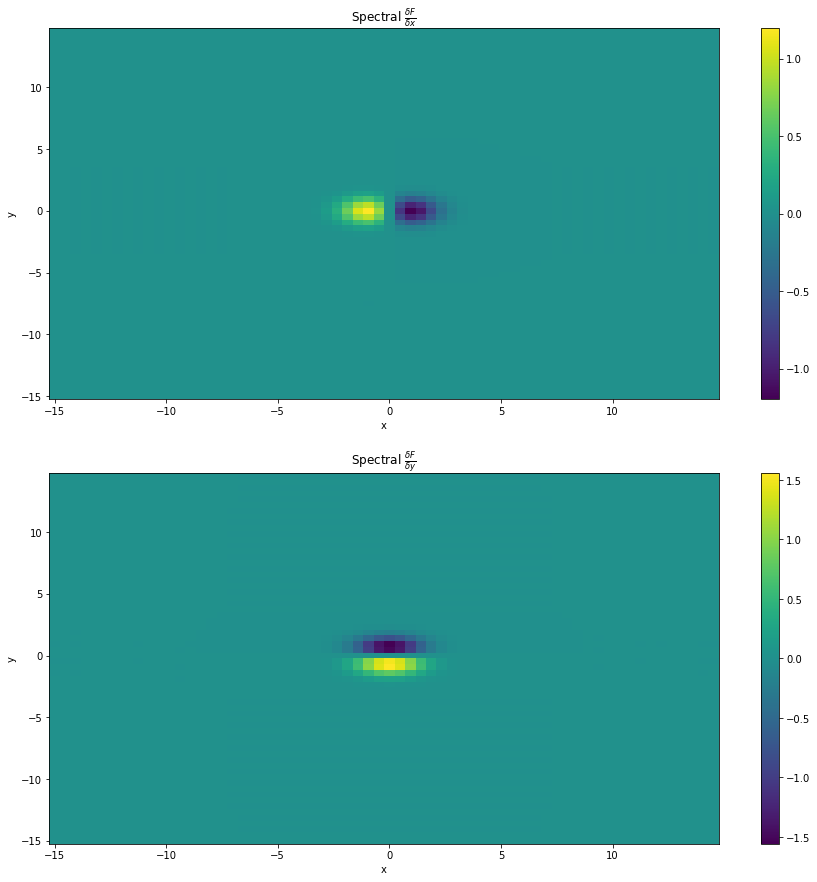

In [293]:
plt.figure(1, figsize=(15, 15))

fx = spectralDerivativeX(xv, yv) 
fy = spectralDerivativeY(xv, yv)

plt.subplot(211)
plt.pcolormesh(xv, yv, fx)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Spectral $\frac{\delta F}{\delta x}$')
plt.colorbar()
plt.subplot(212)
plt.pcolormesh(xv, yv, fy)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Spectral $\frac{\delta F}{\delta y}$')
plt.colorbar()
plt.show()

1.240665109773465e-10
-1.442790398226491e-15
1.2489165832616793e-18
1.7461708828472973e-11


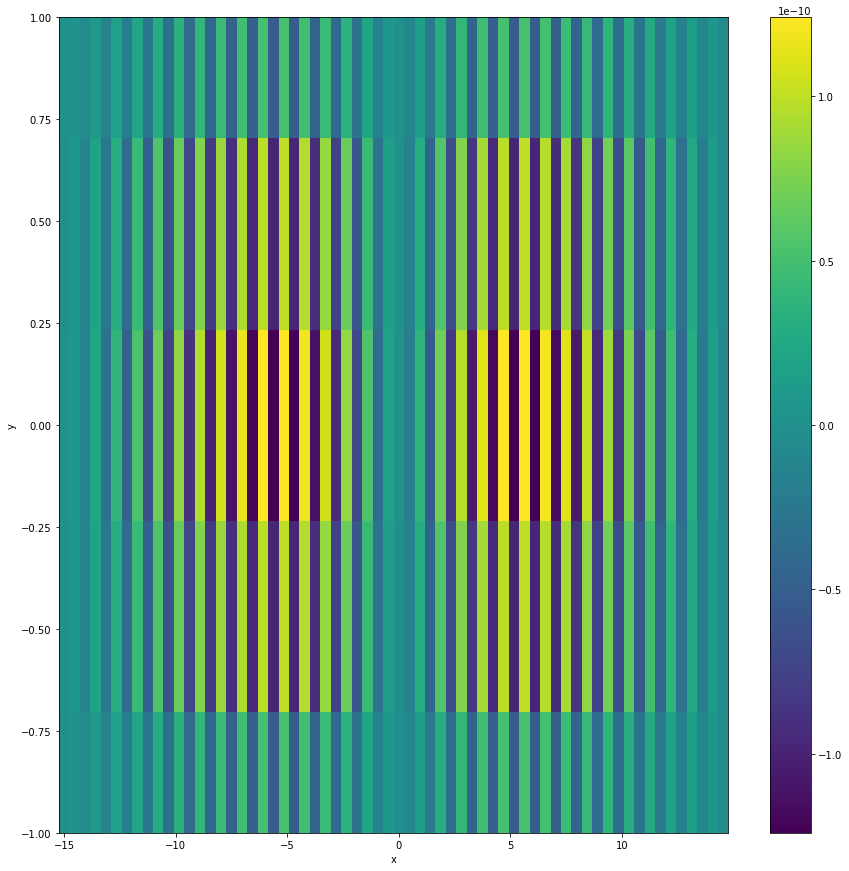

In [294]:
plt.figure(1, figsize=(15, 15))

fxE = Gauss2DderivativeX(xv, yv)
fxF = spectralDerivativeX(xv, yv)
print(np.max(fxE-fxF))
print(np.sum(fxE-fxF))
print(np.sum((fxE-fxF)**2))
print(np.sqrt(np.sum((fxE-fxF)**2))/n)
plt.pcolormesh(xv, yv, fxF-fxE)
plt.ylim(-1, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()